In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [64]:
catboost = pd.read_csv("./output/catboost_clf_ms_data.csv").rename({'prediction':'prediction_catboost'}, axis=1)
bert = pd.read_csv("./output/model_bert_best2.csv").rename({'prediction':'prediction_bert'}, axis=1)
lightgcn = pd.read_csv("./output/lightgcn_best.csv").rename({'prediction':'prediction_lightgcn'}, axis=1)
subs = pd.concat([catboost, bert.drop(['id'], axis=1), lightgcn.drop(['id'], axis=1)], axis=1)

test = pd.read_csv("../../data/test_feature_engineering.csv")

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
subs['cat_bert'] = subs.iloc[:,1:3].apply(lambda x: abs(x[0]-x[1]), axis=1)

<AxesSubplot: ylabel='Frequency'>

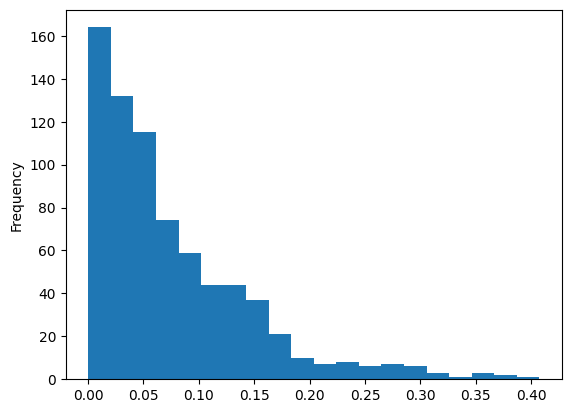

In [67]:
subs.cat_bert.plot(kind="hist", bins=20)

In [68]:
subs[subs['cat_bert']>0.15].shape

(99, 5)

In [69]:
99/subs.shape[0]

0.13306451612903225

In [70]:
id2idex = {v: i for i, v in enumerate(test.userID.unique())}
test['userID'] = test['userID'].map(id2idex)

In [71]:
test['high_diff'] = 0
test.loc[test['userID'].isin(subs[subs['cat_bert']>0.15].id), 'high_diff'] = 1

In [72]:
test

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,assessmentItemID_last,testId_first,testId_last,elapsed,...,prior_quest_count,prior_ac_accuracy,prior_relative_ac_sum,prior_relative_accuracy,prior_assessment_frequency,prior_test_frequency,prior_tags_frequency,diff_time_btw_tags,prev_tag_answer,high_diff
0,0,A050023001,A050000023,1,2020-01-09 10:56:31,2626,1,5,23,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,17.086642,0.0,0
1,0,A050023002,A050000023,1,2020-01-09 10:56:57,2626,2,5,23,3.295837,...,0.693147,1.000000,0.340000,0.340000,0.0,0.693147,0.693147,3.295837,1.0,0
2,0,A050023003,A050000023,0,2020-01-09 10:58:31,2625,3,5,23,4.553877,...,1.098612,1.000000,0.720000,0.360000,0.0,1.098612,0.000000,17.086642,0.0,0
3,0,A050023004,A050000023,0,2020-01-09 10:58:36,2625,4,5,23,1.791759,...,1.386294,0.666667,0.172000,0.057333,0.0,1.386294,0.693147,1.791759,0.0,0
4,0,A050023006,A050000023,0,2020-01-09 10:58:43,2623,6,5,23,2.079442,...,1.609438,0.500000,-0.464000,-0.116000,0.0,1.609438,0.000000,17.086642,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260109,743,A040130001,A040000130,0,2020-10-14 23:07:23,8832,1,4,130,0.000000,...,2.484907,0.727273,-0.786353,-0.071487,0.0,0.000000,0.000000,17.086642,0.0,0
260110,743,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2,4,130,2.944439,...,2.564949,0.666667,-1.223020,-0.101918,0.0,0.693147,0.693147,2.944439,0.0,0
260111,743,A040130003,A040000130,1,2020-10-14 23:08:02,8244,3,4,130,3.091042,...,2.639057,0.692308,-0.706353,-0.054335,0.0,1.098612,0.000000,17.086642,0.0,0
260112,743,A040130004,A040000130,1,2020-10-14 23:09:31,8244,4,4,130,4.499810,...,2.708050,0.714286,-0.553020,-0.039501,0.0,1.386294,0.693147,4.499810,1.0,0


<AxesSubplot: xlabel='assessmentItemID_last', ylabel='count'>

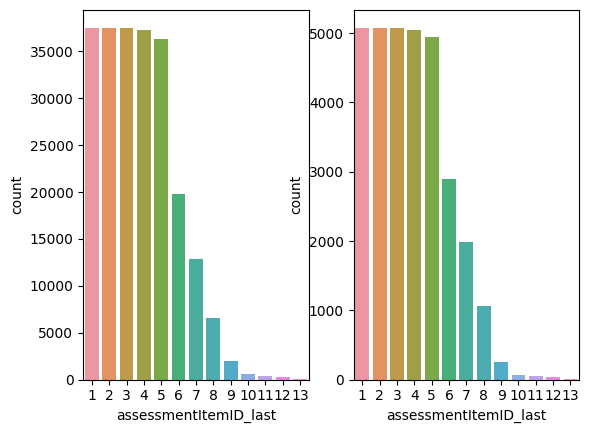

In [78]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='assessmentItemID_last', data=test[test.high_diff==0], ax=axes[0])
sns.countplot(x='assessmentItemID_last', data=test[test.high_diff==1], ax=axes[1])

<AxesSubplot: xlabel='testId_first', ylabel='count'>

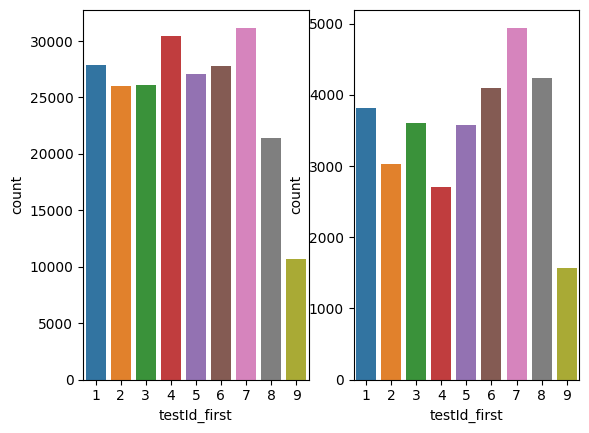

In [79]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='testId_first', data=test[test.high_diff==0], ax=axes[0])
sns.countplot(x='testId_first', data=test[test.high_diff==1], ax=axes[1])

In [81]:
cont_cols = [
    'elapsed', 'accuracy_by_assessment', 'accuracy_by_test',
    'accuracy_by_tag', 'accuracy_by_assessment_last',
    'accuracy_by_test_first', 'accuracy_by_test_last',
    'prior_ac_count', 'prior_quest_count',
    'prior_ac_accuracy', 'prior_relative_ac_sum', 'prior_relative_accuracy',
    'prior_assessment_frequency', 'prior_test_frequency',
    'prior_tags_frequency', 'diff_time_btw_tags', 'prev_tag_answer',
]

In [88]:
len(cont_cols)

17

In [92]:
c

'elapsed'

In [99]:
i

0

<AxesSubplot: xlabel='elapsed', ylabel='Count'>

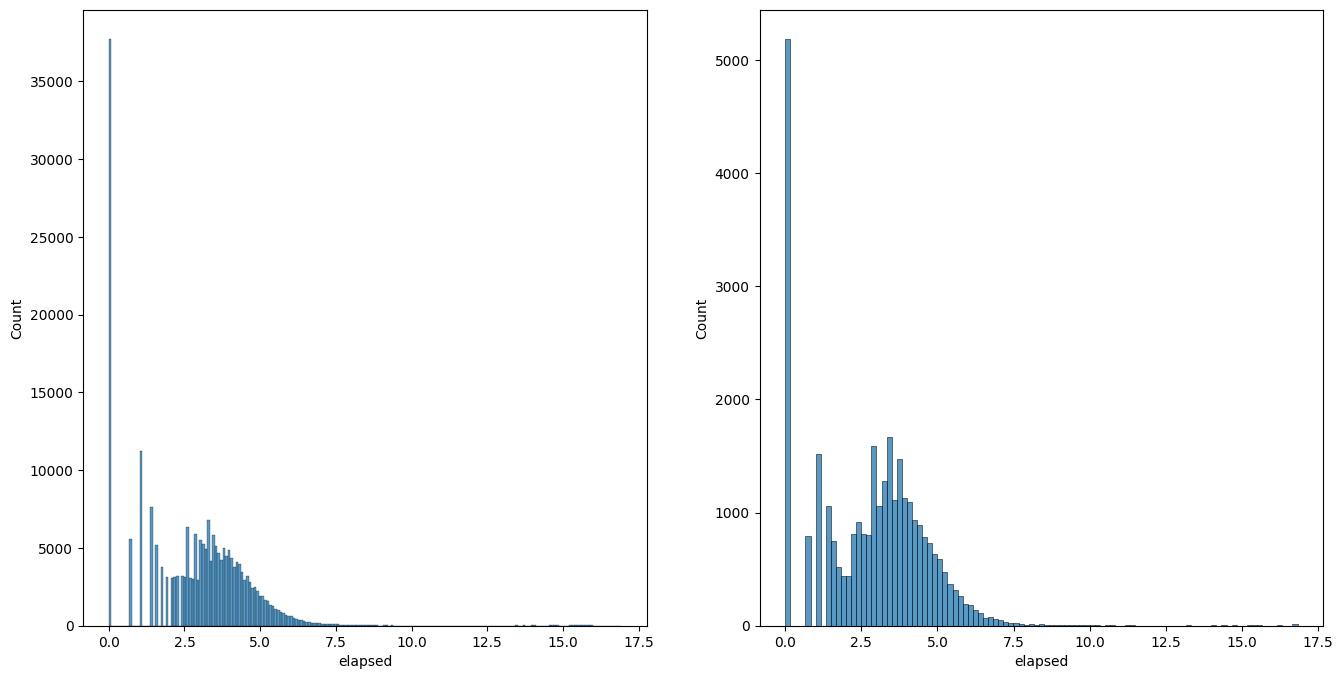

In [101]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))
sns.histplot(x=c, data=test[test.high_diff==0], ax=axes[2*i])
sns.histplot(x=c, data=test[test.high_diff==1], ax=axes[2*i+1])  

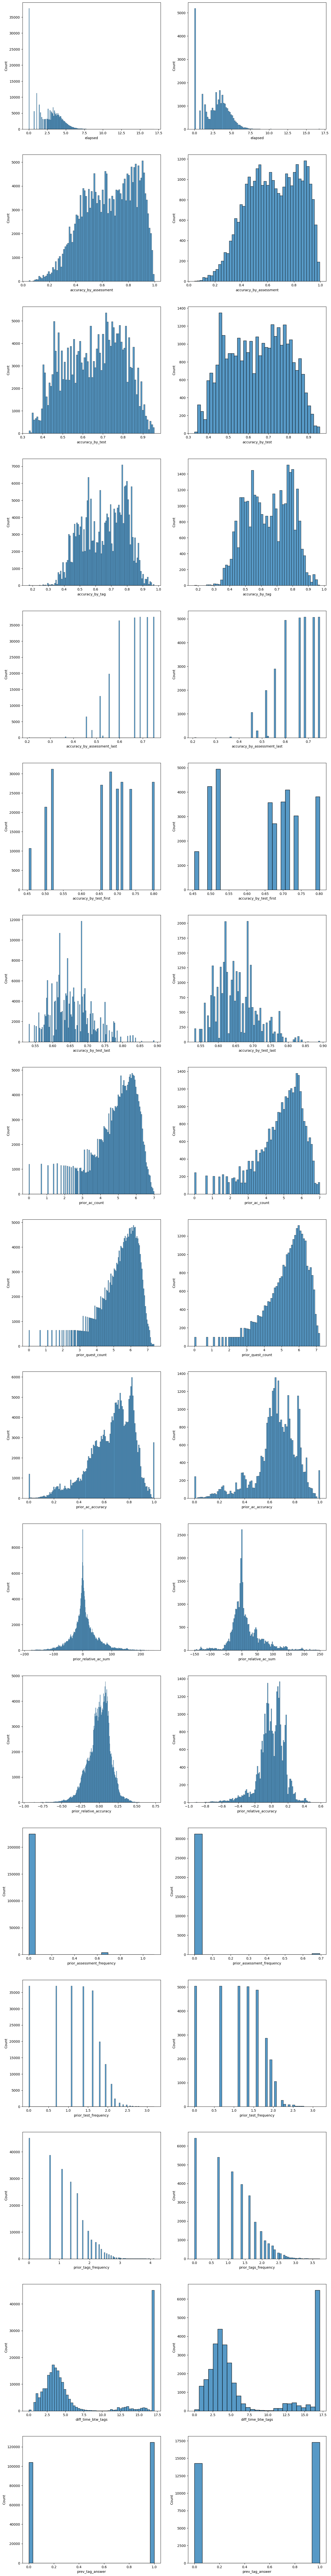

In [103]:
fig, axes = plt.subplots(17,2, figsize=(16, 8*17))
for i, c in enumerate(cont_cols):
    sns.histplot(x=c, data=test[test.high_diff==0], ax=axes[i][0])
    sns.histplot(x=c, data=test[test.high_diff==1], ax=axes[i][1])  

In [105]:
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [106]:
lightgcn = pd.read_csv("./output/lightgcn_best.csv")
catboost_clf_ms_data = pd.read_csv("./output/catboost_clf_ms_data.csv")
lgbmregressor_ms_data = pd.read_csv("./output/lgbmregressor_ms_data.csv")
tabnet805 = pd.read_csv("./output/tabnet805.csv")
stack = pd.read_csv("./output/stack.csv")
catboost_pkt = pd.read_csv("./output/catboost_pkt.csv")
lstmattn_best_sigmoid = pd.read_csv("./output/lstmattn_best_sigmoid.csv")
model_lstm_best2 = pd.read_csv("./output/model_lstm_best2.csv")
model_lstmattn_best2 = pd.read_csv("./output/model_lstmattn_best2.csv")
model_bert_best2 = pd.read_csv("./output/model_bert_best2.csv")

In [117]:
col_names = [
    'lightgcn', 'catboost_clf_ms_data', 'lgbmregressor_ms_data', 'tabnet805', 'stack',
    'catboost_pkt', 'lstmattn_best_sigmoid', 
    'model_lstm_best2', 'model_lstmattn_best2', 'model_bert_best2'
]

In [118]:
concat = pd.concat([
    lightgcn['prediction'],
    catboost_clf_ms_data['prediction'], lgbmregressor_ms_data['prediction'], tabnet805['prediction'],
    stack['prediction'], catboost_pkt['prediction'], lstmattn_best_sigmoid['prediction'], 
    model_lstm_best2['prediction'], model_lstmattn_best2['prediction'], model_bert_best2['prediction']
], axis=1)
concat.columns = col_names

In [120]:
for c1 in concat.items():
    for c2  in concat.items():
        print(c1[0], c2[0])
        print(cos_sim(c1[1], c2[1]))
        print()

lightgcn lightgcn
0.9999999999999999

lightgcn catboost_clf_ms_data
0.9608819456400504

lightgcn lgbmregressor_ms_data
0.9551959147173607

lightgcn tabnet805
0.9312645498561262

lightgcn stack
0.9480131858430213

lightgcn catboost_pkt
0.9518201229223361

lightgcn lstmattn_best_sigmoid
0.9135551250958991

lightgcn model_lstm_best2
0.9563625595460318

lightgcn model_lstmattn_best2
0.9556797729168003

lightgcn model_bert_best2
0.9507518330364443

catboost_clf_ms_data lightgcn
0.9608819456400504

catboost_clf_ms_data catboost_clf_ms_data
0.9999999999999999

catboost_clf_ms_data lgbmregressor_ms_data
0.9811111639137367

catboost_clf_ms_data tabnet805
0.9640743913634148

catboost_clf_ms_data stack
0.9790184214936714

catboost_clf_ms_data catboost_pkt
0.9808938481974169

catboost_clf_ms_data lstmattn_best_sigmoid
0.9425385016590714

catboost_clf_ms_data model_lstm_best2
0.9837314457429936

catboost_clf_ms_data model_lstmattn_best2
0.9861278092087639

catboost_clf_ms_data model_bert_best2
0.98

In [127]:
1/3*0.25+1/3*0.5+0.25*1/3 +1/3*0.25+1/3*0.25+1/3*0.25+1/3*0.25+1/3*0.2+0.25*1/3+1/3*0.3+0.25*1/3

1.0